In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("Data/Plus_De_Trou/Plus_De_Trou_m.txt", sep=";")

data.head()

,mean,stdev,acceptation,E(fitness),sigma(fitness),Generation,fitness1,"Genes(Scores(0,1),:)",fitness50,"Genes(Scores(49,1),:)",fitness100,"Genes(Scores(99,1),:)",Unnamed: 12
0,-10,10,0.9,-669.135,4118.08,0,-59.7889,"[-2.74129, -16.1543, -3.34056, -25.149, 2.654...",-75.7999,"[ 3.6845, -14.9506, -18.7664, -7.44432, -11.47...",[ -41112.2,"0.359225, -17.9806, -2.20503, -0.851826, -1.0...",NaN
1,-10,10,0.9,-921.123,4338.01,1,-60.6967,"[-14.0012, -12.6932, -13.1377, -5.8805, 2.962...",-73.6543,"[ -2.00535, -29.7176, 7.25221, -13.5292, -5.49...",[ -41113.6,"-11.5249, -14.9506, -18.7664, -7.44432, -14.4...",NaN
2,-10,10,0.9,-1011.210,4528.42,2,-54.5740,"[-3.78473, -23.8334, -15.3374, -5.72705, 0.06...",-73.6543,"[ -2.00535, -29.7176, 7.25221, -13.5292, -5.49...",[ -35328.2,"-4.39855, -23.5984, -19.542, -4.2425, -5.3977...",NaN
3,-10,10,0.9,-1863.280,9976.63,3,-60.6967,"[-14.0012, -12.6932, -13.1377, -5.8805, 2.962...",-72.0856,"[ -11.8527, -18.6307, -4.40351, -13.3075, 0.99...",[ -89612.6,"-11.2381, -6.06111, -28.5437, -19.6413, -16.0...",NaN
4,-10,10,0.9,-1262.010,8942.45,4,-60.6967,"[-14.0012, -12.6932, -13.1377, -5.8805, 2.962...",-74.0955,"[ -5.56942, -17.4033, 6.70387, -8.63294, -12.3...",[ -89612.6,"-11.2381, -6.06111, -28.5437, -19.6413, -16.0...",NaN


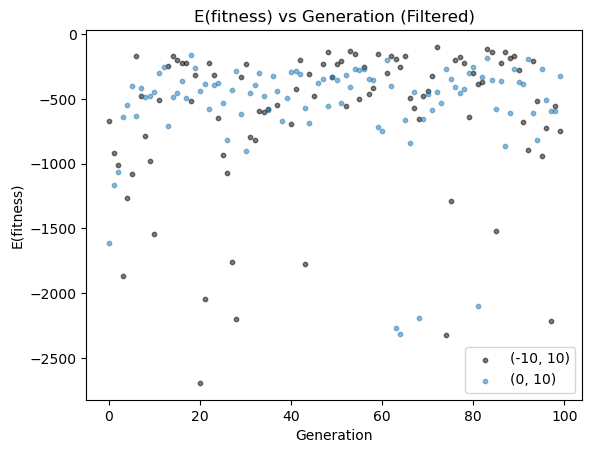

In [2]:
Values = [(-10, 10, -3000, "k"), (0, 10, -3000, "tab:blue")]

for i in range(len(Values)):
    mean = Values[i][0]
    stdev = Values[i][1]
    treshold = Values[i][2]
    color = Values[i][3]
    dataf = data[((data["E(fitness)"] >= treshold) & (data["mean"] == mean) & (data["stdev"] == stdev))]

    plt.scatter(dataf["Generation"], dataf["E(fitness)"], c=color, alpha=0.5, s=10, label=f'({mean}, {stdev})')
plt.xlabel("Generation")
plt.ylabel("E(fitness)")
plt.title("E(fitness) vs Generation (Filtered)")
plt.legend()
plt.show()

In [3]:
def Visualiser_data(mean, stdev, acceptation, Name):
    A = np.array([])
    B = [str(mean), str(stdev), str(acceptation)]

    df = data[((data["mean"] == mean) & (data["stdev"] == stdev) & (data["acceptation"] == acceptation))]

    mask = (df["Generation"] == 0)

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))


    mask = (df["fitness1"] == df["fitness1"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    mask = (df["Generation"] == df["Generation"].max())

    A = np.array([df[mask]["E(fitness)"], df[mask]["fitness1"], df[mask]["Genes(Scores(0,1),:)"]])
    B.append(str(A[0][0]))
    B.append(str(A[1][0]))
    B.append(A[2,0][2:-2].replace(",",""))

    with open(Name, "w") as file:
        # Write each string to the file
        for string in B:
            file.write(string + "\n")

In [8]:
#stdev = 10 -> mean = -10, 0, 10
#stdev = 8 -> -5,0, 5

mean = 5
stdev = 8
acceptation = 0.9
Name = "test.txt"
Visualiser_data(mean, stdev, acceptation, Name)